In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_tsne = pd.read_parquet('data/results/df_tsne.parquet')
df_tsne.head()

,PC1,PC2,Label
0,-18.322725,-16.672157,Syn
1,-54.868546,-18.410553,Syn
2,-45.054012,13.397923,Syn
3,-39.239132,-16.504389,Syn
4,-46.235340,1.965008,Syn


In [10]:
df_tsne_no_benign = pd.read_parquet('data/results/df_tsne_no_benign.parquet')
df_tsne_no_benign.head()

,PC1,PC2,Label
0,-4.541570,-11.997326,Syn
1,-49.244247,-6.464272,Syn
2,-13.750749,8.129172,Syn
3,-34.420837,-13.216851,Syn
4,-25.592207,4.358292,Syn


In [11]:
def euclidean_distance(*args):
    return np.sqrt(np.sum((args[0] - args[1]) ** 2))

In [12]:
samples = df_tsne.sample(100)

In [13]:
samples_no_benign = df_tsne_no_benign.sample(100)

<Axes: >

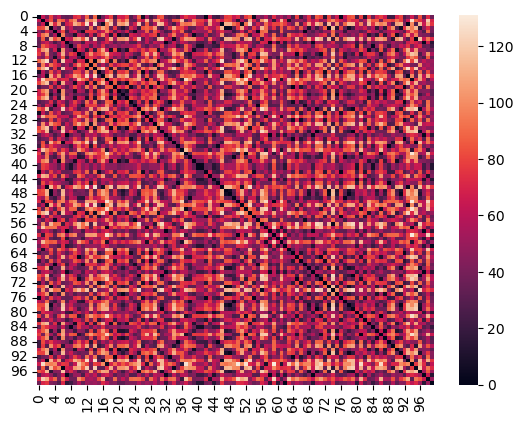

In [14]:
# compute the distance matrix between all the points
distance_matrix = np.zeros((samples[['PC1', 'PC2']].shape[0], samples[['PC1', 'PC2']].shape[0]))
for i in range(samples[['PC1', 'PC2']].shape[0]):
    for j in range(samples[['PC1', 'PC2']].shape[0]):
        distance_matrix[i, j] = euclidean_distance(samples[['PC1', 'PC2']].iloc[i], samples[['PC1', 'PC2']].iloc[j])

sns.heatmap(distance_matrix)

<Axes: >

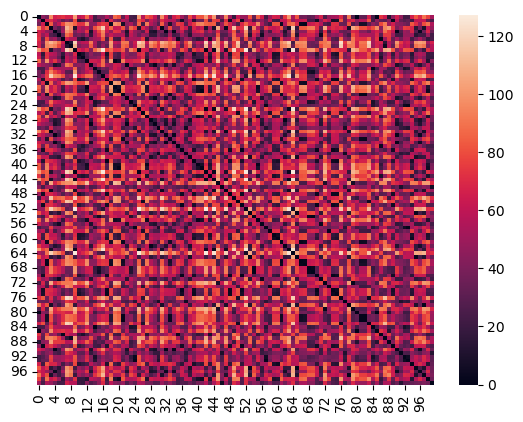

In [15]:
distance_matrix = np.zeros((samples_no_benign[['PC1', 'PC2']].shape[0], samples_no_benign[['PC1', 'PC2']].shape[0]))
for i in range(samples_no_benign[['PC1', 'PC2']].shape[0]):
    for j in range(samples_no_benign[['PC1', 'PC2']].shape[0]):
        distance_matrix[i, j] = euclidean_distance(samples_no_benign[['PC1', 'PC2']].iloc[i], samples_no_benign[['PC1', 'PC2']].iloc[j])

sns.heatmap(distance_matrix)

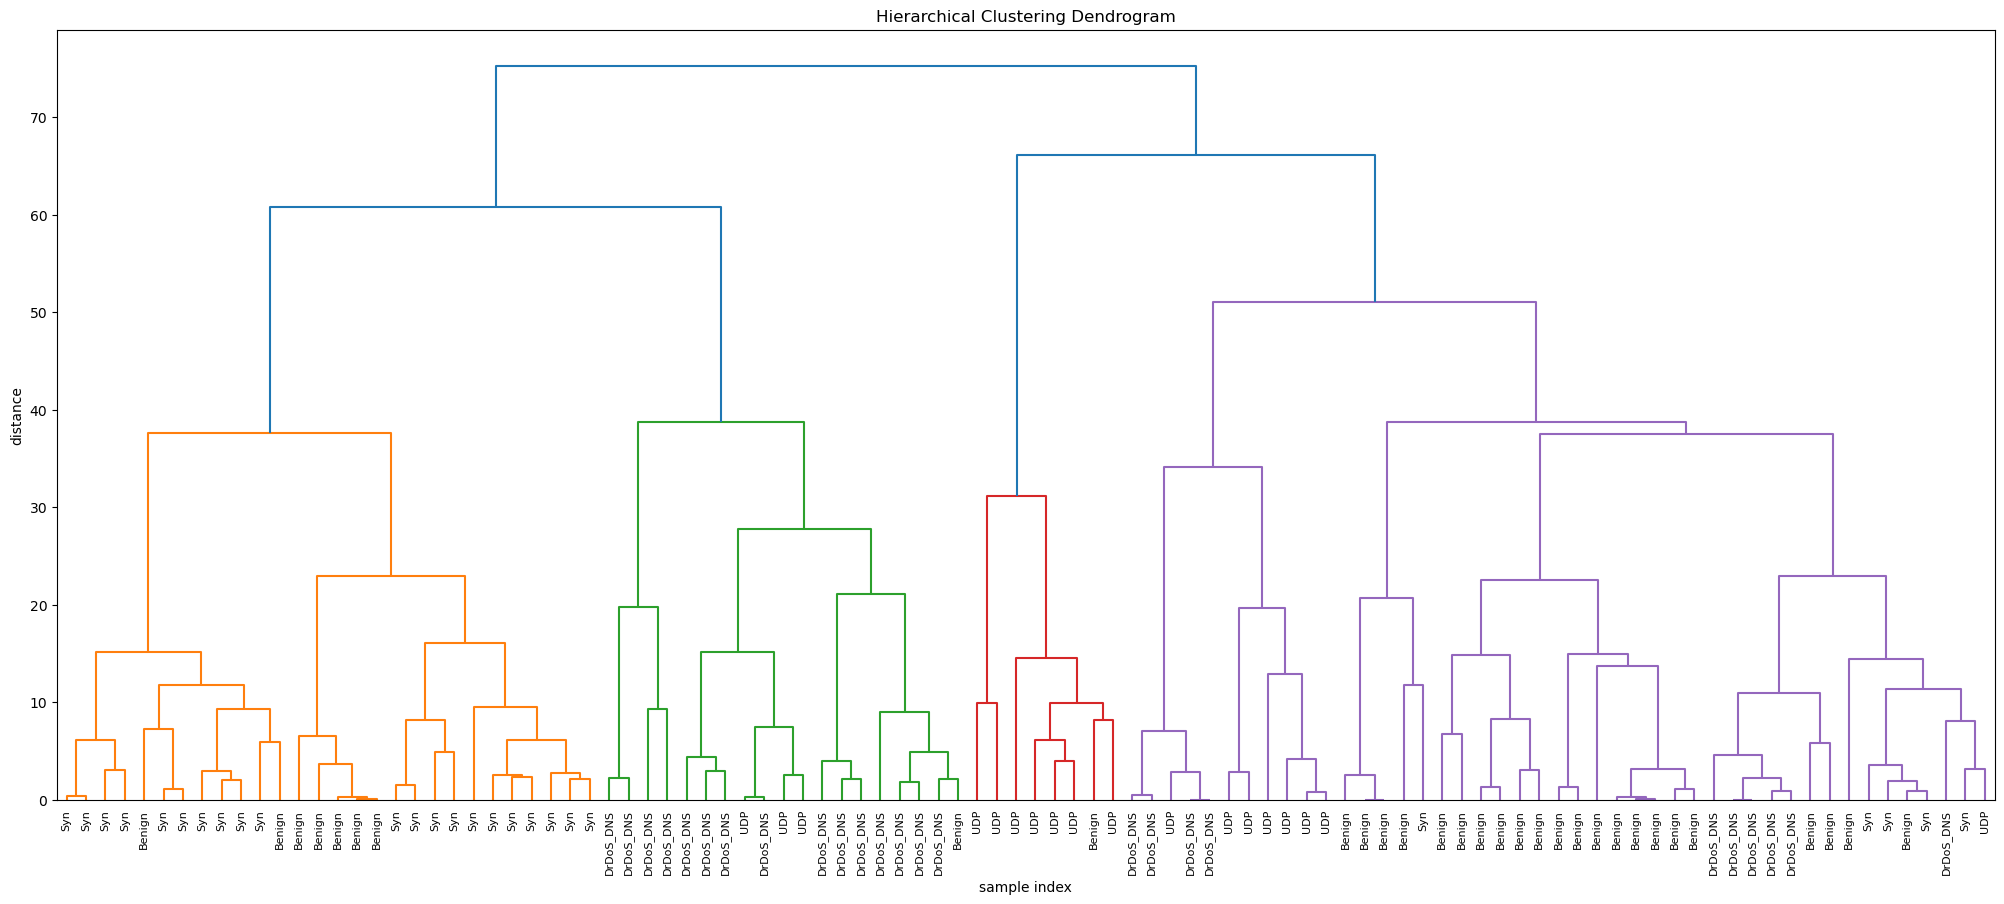

In [16]:
# import linkage
from scipy.cluster.hierarchy import linkage

# compute the linkage matrix
Z = linkage(samples[['PC1', 'PC2']], method='average', metric='euclidean')

# plot the dendrogram
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=samples['Label'].values)
plt.show()

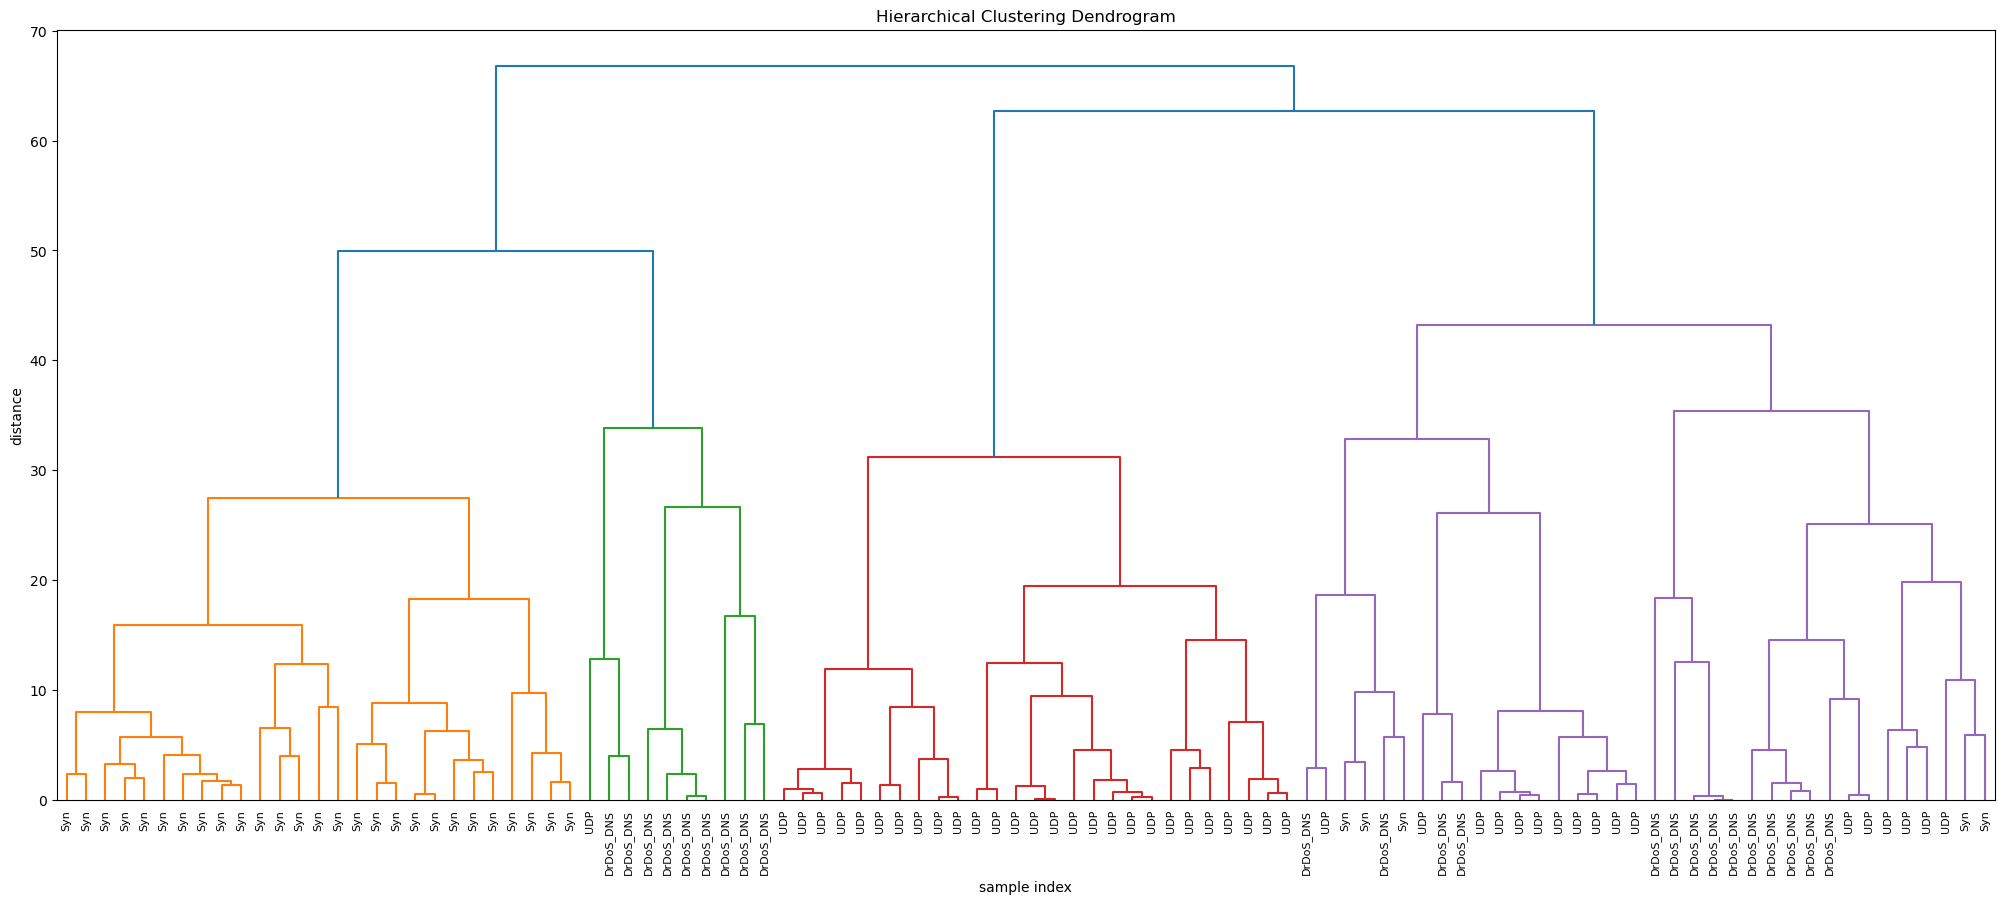

In [17]:
Z_no_benign = linkage(samples_no_benign[['PC1', 'PC2']], method='average', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z_no_benign, leaf_rotation=90., leaf_font_size=8., labels=samples_no_benign['Label'].values)
plt.show()